/Users/thanapolphungtua-eng/source_code/VENV/thesis_sourcecode/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


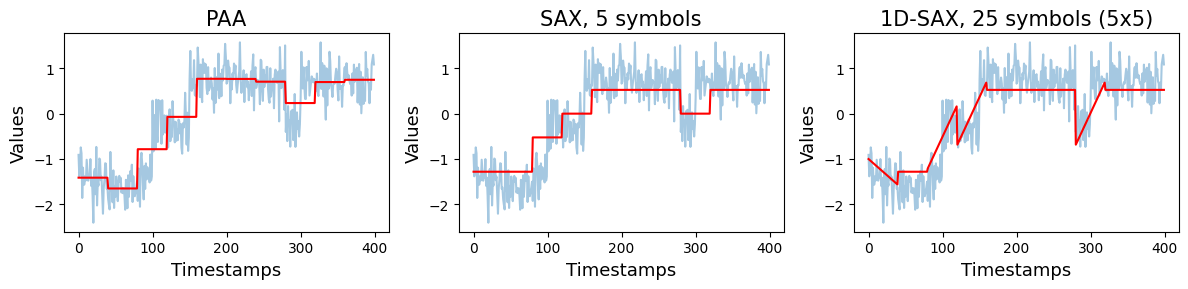

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, \
    OneD_SymbolicAggregateApproximation

np.random.seed(0)
trend = np.zeros(100)
trend = np.concatenate([trend, np.ones(50)])
trend = np.concatenate([trend, 2 * np.ones(130)])
trend = np.concatenate([trend, 1 * np.ones(20)])
trend = np.concatenate([trend, 2 * np.ones(100)])

residual = 0.3 * np.random.randn(len(trend))
ts = trend + residual
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts_z = scaler.fit_transform([ts])

# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(ts_z))

# SAX transform
n_sax_symbols = 5
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(ts_z))

# 1d-SAX transform
n_sax_symbols_avg = 5
n_sax_symbols_slope = 5
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)
transformed_data = one_d_sax.fit_transform(ts_z)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(transformed_data)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].plot(ts_z[0].ravel(), alpha=0.4)
axes[0].plot(paa_dataset_inv[0].ravel(), "r")
axes[0].set_title('PAA', fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=13)
axes[0].set_ylabel('Values', fontsize=13)


axes[1].plot(ts_z[0].ravel(), alpha=0.4)
axes[1].plot(sax_dataset_inv[0].ravel(), "r")
axes[1].set_title(f'SAX, {n_sax_symbols} symbols', fontsize=15)
axes[1].set_xlabel('Timestamps', fontsize=13)
axes[1].set_ylabel('Values', fontsize=13)


axes[2].plot(ts_z[0].ravel(), alpha=0.4)
axes[2].plot(one_d_sax_dataset_inv[0].ravel(), "r")
axes[2].set_title(f'1D-SAX, {n_sax_symbols_avg * n_sax_symbols_slope} symbols ({n_sax_symbols_avg}x{n_sax_symbols_slope})', fontsize=15)
axes[2].set_xlabel('Timestamps', fontsize=13)
axes[2].set_ylabel('Values', fontsize=13)

plt.tight_layout()
plt.show()